In [1]:
# JEFERSON GALLEGO CHAVERRA
# PEDRO ALEJANDRO SANCHEZ OSORIO
# VICTOR ALFONSO MOYANO ECHEVERRI
 
from sympy import MatrixSymbol, Matrix, Identity
import sympy as sym
import pandas as pd
sym.init_printing()
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

In [2]:
# Simulacion
datos= pd.read_excel("C:/Users/jefer/OneDrive/Documentos/2023-1/Identificacion_de_Sistemas/Lab1/Lab1a.xlsx")
datos

,Unnamed: 0,Aceleracion,Fuerza,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,-0.019254,-0.962679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-0.019254,-0.962679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-0.019254,-0.962679,NaN,Sistemas sin Amostiguador,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fuerza VS Tiempo
3,NaN,-0.019254,-0.962679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,-0.019254,-0.962679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,NaN,-0.017258,-0.862880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5048,NaN,-0.017258,-0.862880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5049,NaN,-0.017258,-0.862880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5050,NaN,0.010132,0.506611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# M2 ESTIMACION POR ERROR EN VARIABLE
def est2(datos):
    return np.average( datos['Fuerza']) / np.average(datos['Aceleracion'] )
R2 = est2(datos)
R2

In [4]:
# M3 ESTIMACIÓN POR MÍNIMOS CUADRADOS
def est3(datos):
    N = len(datos)
    return (sum(datos['Fuerza']*datos['Aceleracion'])/N) / (sum(datos['Aceleracion']**2)/N)
R3 = est3(datos)
R3

In [5]:
# M1 ESTIMACIÓN SIMPLE
def est1(datos):
    return np.average( datos['Fuerza'] / datos['Aceleracion'] )
R1 = est1(datos)
R1

In [6]:
# GUARDO INFORMACION PARA LA GRAFICA
ns = range(10,5000,10)
M1Perf = []
M2Perf = []
M3Perf = []
for n in ns:
    data_sub = datos.sample(n)
    M1Perf.append(est1(data_sub))
    M2Perf.append(est2(data_sub))
    M3Perf.append(est3(data_sub))
    
dataPerf = pd.DataFrame(data = {'muestras':ns,'Perf1':M1Perf,
                                'Perf2':M2Perf,'Perf3':M3Perf
                               })

<AxesSubplot:xlabel='muestras', ylabel='value'>

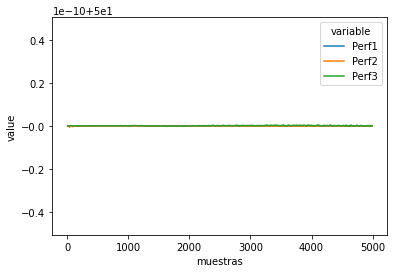

In [7]:
# GRAFICO
sns.lineplot(x='muestras', y='value', hue='variable', 
             data=pd.melt(dataPerf, ['muestras']))